<a href="https://colab.research.google.com/github/plance17/Aprendizaje-de-Maquina/blob/master/Teor%C3%ADa_2_Ejercicio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Primer Tabla de Datos**

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import math
import pandas as pd 
from scipy import linalg, optimize
from sympy.solvers import solve
from sympy import Symbol

# realizar solicitudes web desde una URL
import requests

import urllib.request 

# xlrd nos ayuda a extraer datos de hojas de cálculo de Excel (.xls y .xlsx)
# https://xlrd.readthedocs.io/en/latest/
from xlrd import open_workbook

In [17]:
#Primer link de la diapositiva 29 de la Teoría de la clase 2
#La forma de leer los archivos lo saqué del código de Manlio para leer los datos de educación en California


#descargar y guardar el archivo localmente
source_data_url = "https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/casos_covid_bahia.csv"
sat_file = requests.get(source_data_url)

#Permito la lectura de los datos del URL
url_data=urllib.request.urlopen(source_data_url)


print(sat_file)

<Response [200]>


In [18]:
#Ahora la variable data son los datos dentro del URL
data2=url_data.read().splitlines()


data=pd.read_csv(source_data_url,delimiter=',')

print(data2)
print('\n \n \n')
print(data)


[b'fecha,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos', b'2020-06-30,106,29,71,6,574,23,342,2338,181,0', b'2020-07-01,114,31,77,6,581,22,342,2207,172,0', b'2020-07-02,124,40,78,6,588,24,356,2162,176,0', b'2020-07-03,137,53,78,6,606,31,356,2353,190,0', b'2020-07-04,154,70,78,6,622,31,356,2377,214,0', b'2020-07-05,159,74,79,6,635,37,356,1934,181,0', b'2020-07-06,177,91,80,6,646,52,371,1966,247,0', b'2020-07-07,188,97,84,7,669,57,371,2001,252,0', b'2020-07-08,209,109,93,7,687,55,371,2018,242,0', b'2020-07-09,233,130,96,7,710,56,371,1264,297,0', b'2020-07-10,248,141,99,8,728,45,371,1151,197,0', b'2020-07-11,265,158,99,8,744,53,371,1186,228,0', b'2020-07-12,282,171,102,9,758,64,371,1282,246,0', b'2020-07-13,291,178,104,9,886,79,371,1374,264,0', b'2020-07-14,303,189,105,9,911,73,371,1406,228,0', b'2020-07-15,315,198,108,9,972,62,371,1379,219,0', b'2020-07-16,330,202,119,9,996,80,

In [19]:
print(data.columns)

Index(['fecha', 'confirmados', 'activos', 'recuperados', 'decesos',
       'descartados', 'sospechosos', 'contencion_psicologica',
       'monitoreo_epidemiologico', 'aislamiento_por_contacto_estrecho',
       'aprehendidos'],
      dtype='object')


Para los gráficos queda mas cómo poner las fechas sin el 2020, que el año es el mismo para todos. Creo la variable date como un vector de strings, donde cada componente es el mes y el día

In [20]:
print(data.fecha)


date=['']*data.fecha.size
index=np.zeros(data.fecha.size)

for j in np.arange(0,data.fecha.size):
  p=0
  index[j]=j
  for letter in data.fecha[j]:
    if p>4:
      date[j]=date[j]+letter
    p=p+1
  

print(date)
print(index)

0     2020-06-30
1     2020-07-01
2     2020-07-02
3     2020-07-03
4     2020-07-04
         ...    
83    2020-09-21
84    2020-09-22
85    2020-09-23
86    2020-09-24
87    2020-09-25
Name: fecha, Length: 88, dtype: object
['06-30', '07-01', '07-02', '07-03', '07-04', '07-05', '07-06', '07-07', '07-08', '07-09', '07-10', '07-11', '07-12', '07-13', '07-14', '07-15', '07-16', '07-17', '07-18', '07-19', '07-20', '07-21', '07-22', '07-23', '07-24', '07-25', '07-26', '07-27', '07-28', '07-29', '07-30', '07-31', '08-01', '08-02', '08-03', '08-04', '08-05', '08-06', '08-07', '08-08', '08-09', '08-10', '08-11', '08-12', '08-13', '08-14', '08-15', '08-16', '08-17', '08-18', '08-19', '08-20', '08-21', '08-22', '08-23', '08-24', '08-25', '08-26', '08-27', '08-28', '08-29', '08-30', '08-31', '09-01', '09-02', '09-03', '09-04', '09-05', '09-06', '09-07', '09-08', '09-09', '09-10', '09-11', '09-12', '09-13', '09-14', '09-15', '09-16', '09-17', '09-18', '09-19', '09-20', '09-21', '09-22', '09-23',

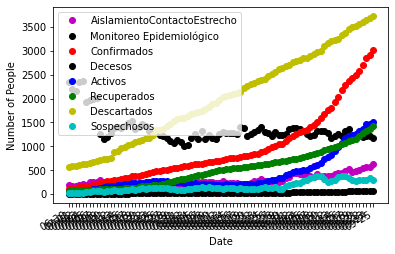

In [22]:
fig, ax = plt.subplots()

fig.autofmt_xdate()

plt.plot(date,data.aislamiento_por_contacto_estrecho ,'mo',label='AislamientoContactoEstrecho')
plt.plot(date,data.monitoreo_epidemiologico ,'ko',label='Monitoreo Epidemiológico')
plt.plot(date,data.confirmados ,'ro',label='Confirmados')
plt.plot(date,data.decesos ,'ko',label='Decesos')
plt.plot(date,data.activos ,'bo',label='Activos')
plt.plot(date,data.recuperados ,'go',label='Recuperados')
plt.plot(date,data.descartados ,'yo',label='Descartados')
plt.plot(date,data.sospechosos ,'co',label='Sospechosos')

#plt.gcf().autofmt_xdate()
#plt.xticks()
#plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Number of People')
plt.legend(loc='upper left')
plt.show()


El número de personas sospechosas y de contacto estrecho es similar, con lo cual podría asumirse que en la mayoría de los casos se sabe cual es el foco de origen, aunque para verificar mejor eso sería conveniente saber cuantos de los de aislamiento por contacto estrecho luego para a ser del grupo descartado o del grupo confirmado.

------------------------------------------------------------------------------------------------------------------


[93.6715396582838, -1.62822928787057 - 19.4363653919953*I, -1.62822928787057 + 19.4363653919953*I]


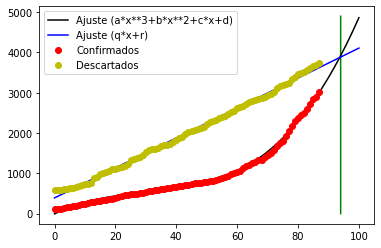

In [23]:
x=Symbol('x')

def func3(x,a,b,c,d):
    return a*x**3+b*x**2+c*x+d
    
popt, pcov = scipy.optimize.curve_fit(func3, index, data.confirmados)
x_confirmados_ajuste2 = np.linspace(0,100)
y_confirmados_ajuste2 = popt[0]*x_confirmados_ajuste2**3+popt[1]*x_confirmados_ajuste2**2+popt[2]*x_confirmados_ajuste2+popt[3]


def func2(x,q,r):
    return q*x+r
popt2, pcov2 = scipy.optimize.curve_fit(func2, index, data.descartados)
x_descartados_ajuste = np.linspace(0,100)
y_descartados_ajuste = popt2[0]*x_descartados_ajuste+popt2[1]

gasx=[94]*4900
gasy=np.arange(0,4900)

#plt.plot(x_confirmados_ajuste,y_confirmados_ajuste ,'red',label='Ajuste (a*exp(b*x+c)')
plt.plot(gasx,gasy ,'green',label='')
plt.plot(x_confirmados_ajuste2,y_confirmados_ajuste2 ,'black',label='Ajuste (a*x**3+b*x**2+c*x+d)')
plt.plot(x_descartados_ajuste,y_descartados_ajuste ,'blue',label='Ajuste (q*x+r)')
plt.plot(index,data.confirmados ,'ro',label='Confirmados')
plt.plot(index,data.descartados ,'yo',label='Descartados')
plt.legend(loc='upper left')



intersection_point=solve((popt[0]*x**3+popt[1]*x**2+popt[2]*x+popt[3])-(popt2[0]*x+popt2[1]), x )

print(intersection_point)


Realizando ajustes sobre los datos de pacientes Confirmados y Descartados, y asumiendo que el creicimiento seguirá de esa forma, se puede estimar el día en el que el número de casos confirmados superará al de descartados. Por lo tanto, a partir de ese día, de los casos sospechosos que haya, lo mas probable es que l mas de la mitad luego sean confirmados.

El día correspondiente a esto sería el día 94 a partir del cual se tienen registros. Ese día sería el 01/10/2020

In [24]:
print(data.fecha.size)

confirmados_por_dia=np.zeros(data.fecha.size)
confirmados_por_dia[0]=data.confirmados[0]

recuperados_por_dia=np.zeros(data.fecha.size)
recuperados_por_dia[0]=data.confirmados[0]

#sospechosos_por_dia=np.zeros(data.fecha.size)
descartados_por_dia=np.zeros(data.fecha.size)
decesos_por_dia=np.zeros(data.fecha.size)

for i in np.arange(1,data.fecha.size):
  confirmados_por_dia[i]=data.confirmados[i]-data.confirmados[i-1]
  recuperados_por_dia[i]=data.recuperados[i]-data.recuperados[i-1]
  descartados_por_dia[i]=data.descartados[i]-data.descartados[i-1]
  decesos_por_dia[i]=data.decesos[i]-data.decesos[i-1]
  
  
  #NO PUEDO CALCULAR LOS SOSPECHOSOS POR DÍA
  #Puedo obtener la diferencia entre un día y otro, y ese sería el número mínimo de sospechosos nuevos en el día. Pero si en el día anterior hubo algún sospechoso que se confirmó o que se descartó
  #no puedo saberlo, y el número de sospecosos del día sería mayor
  #sospechosos_por_dia[i]=data.sospechosos[i]-(data.sospechosos[i]-descartados_por_dia[i-1])


print(confirmados_por_dia)
print(recuperados_por_dia)

print(decesos_por_dia)
#El dia cero tiene muchos confirmados porque ahí comienza el registro, no es que ese día hubo 106 infectados, vienen de antes del 30/6
#Me convendría tomarlo cero, porque no es real
#Lo mismo para recuperados por dia

88
[106.   8.  10.  13.  17.   5.  18.  11.  21.  24.  15.  17.  17.   9.
  12.  12.  15.  15.  26.   3.  11.  16.  28.  22.  16.  14.   4.  11.
  12.  15.  16.  13.  20.   5.  11.  21.  13.   3.  14.  19.   4.  13.
   9.  14.  17.  29.   8.   3.   7.  16.  13.  11.  18.  19.  10.  27.
  26.  40.  34.  27.  36.  20.  61.  52.  40.  41.  39.  30.  14.  60.
  53.  61.  76. 101.  68.  56. 115. 115. 136. 114.  87.  62.  47. 102.
 125. 127.  65. 106.]
[106.   6.   1.   0.   0.   1.   1.   4.   9.   3.   3.   0.   3.   2.
   1.   3.  11.   8.   1.   6.   6.  18.   8.  11.   8.   8.   4.  16.
  13.  32.  13.  20.  14.  19.  19.  21.  14.  15.  15.  14.  13.  18.
  26.  17.  12.  14.  11.   8.   3.   9.  11.  10.   6.  16.   3.  12.
  17.   5.  23.  17.   5.   9.   8.  17.  13.  10.  29.  21.  13.  20.
  14.  21.  32.  33.  16.  23.  24.  32.  42.  16.  36.  27.  25.  50.
  73.  31.  53.  68.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 2. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 1. 1. 

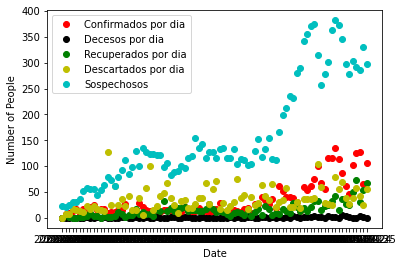

In [25]:
confirmados_por_dia[0]=0
recuperados_por_dia[0]=0

plt.plot(data.fecha,confirmados_por_dia ,'ro',label='Confirmados por dia')
plt.plot(data.fecha,decesos_por_dia ,'ko',label='Decesos por dia')
plt.plot(data.fecha,recuperados_por_dia ,'go',label='Recuperados por dia')
plt.plot(data.fecha,descartados_por_dia ,'yo',label='Descartados por dia')
plt.plot(data.fecha,data.sospechosos ,'co',label='Sospechosos')

#plt.plot(data.fecha,data.sospechosos ,'co',label='Sospechosos')
plt.xlabel('Date')
plt.ylabel('Number of People')
plt.legend(loc='upper left')
plt.show()


En los últimos días, el número de confirmados por dia supera a los descartados. Por lo tanto, el virus no está controlado, la cantidad de gente infectada sigue en aumento.
(Asumo que una persona para estar en el grupo de confirmado o descartado si o sí tiene que pasar primero por el grupo de sospechosos)

También se puede ver que en esos días el número de casos sospechosos aumenta a un nuevo valor, mostrando un brote fuerte del virus, lo cual también se reflejaen el aumento del número de casos confirmados, sin aumento del número de casos descartados. El número de casos confirmados es menor al de casos sospechosos, dado el tiempo que demora en hacerse el hisopado y obtener los resultados.

Debería igual también tener la informacion si los sospechosos por día son nuevos sospechosos, o si hay sospechosos que se repiten un mismo día

**Segunda Tabla de Datos**





In [58]:
#Segundo link de la diapositiva 29 de la Teoría de la clase 2
#La forma de leer los archivos lo saqué del código de Manlio para leer los datos de educación en California


#descargar y guardar el archivo localmente
source_data_url_2 = "https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/camas_covid_bahia.csv"
sat_file = requests.get(source_data_url)

#Permito la lectura de los datos del URL
url_data=urllib.request.urlopen(source_data_url_2)


print(sat_file)

<Response [200]>


In [59]:
data_2=pd.read_csv(source_data_url_2,delimiter=',')
print(data_2)

    informeNumero       fecha  ...  sedes_ucma  observaciones
0             131  2020-09-25  ...           4            NaN
1             130  2020-09-24  ...           4            NaN
2             129  2020-09-23  ...           4            NaN
3             128  2020-09-22  ...           4            NaN
4             127  2020-09-21  ...           4            NaN
..            ...         ...  ...         ...            ...
83             10  2020-07-04  ...           3            NaN
84              9  2020-07-03  ...           3            NaN
85              8  2020-07-02  ...           3            NaN
86              7  2020-07-01  ...           3            NaN
87              1  2020-06-30  ...           3            NaN

[88 rows x 19 columns]


In [60]:
print(data_2.columns)

Index(['informeNumero', 'fecha', 'total_camas_hospitales',
       'camas_ocupadas_hospitales', 'porcentaje_ocupacion_camas_hospitales',
       'camas_covid', 'camas_sospechosos_covid', 'camas_confirmados_covid',
       'porcentaje_ocupacion_camas_covid', 'uti_covid_totales',
       'uti_covid_ocupadas', 'respiradores_totales', 'respiradores_ocupados',
       'respiradores_covid_totales', 'respiradores_covid_ocupados',
       'total_camas_ucma', 'total_camas_ocupadas_ucma', 'sedes_ucma',
       'observaciones'],
      dtype='object')


In [61]:
print(data_2.fecha)


date2=['']*data_2.fecha.size
index2=np.zeros(data_2.fecha.size)

for j in np.arange(0,data_2.fecha.size):
  p=0
  index2[j]=j
  for letter in data_2.fecha[j]:
    if p>4:
      date2[j]=date2[j]+letter
    p=p+1
  
print(date2)
print(index2)

0     2020-09-25
1     2020-09-24
2     2020-09-23
3     2020-09-22
4     2020-09-21
         ...    
83    2020-07-04
84    2020-07-03
85    2020-07-02
86    2020-07-01
87    2020-06-30
Name: fecha, Length: 88, dtype: object
['09-25', '09-24', '09-23', '09-22', '09-21', '09-20', '09-19', '09-18', '09-17', '09-16', '09-15', '09-14', '09-13', '09-12', '09-11', '09-10', '09-09', '09-08', '09-07', '09-06', '09-05', '09-04', '09-03', '09-02', '09-01', '08-31', '08-30', '08-29', '08-28', '08-27', '08-26', '08-25', '08-24', '08-23', '08-22', '08-21', '08-20', '08-19', '08-18', '08-17', '08-16', '08-15', '08-14', '08-13', '08-12', '08-11', '08-10', '08-09', '08-08', '08-07', '08-06', '08-05', '08-04', '08-03', '08-02', '08-01', '07-31', '07-30', '07-29', '07-28', '07-27', '07-26', '07-25', '07-24', '07-23', '07-22', '07-21', '07-20', '07-19', '07-18', '07-17', '07-16', '07-15', '07-14', '07-13', '07-12', '07-11', '07-10', '07-09', '07-08', '07-07', '07-06', '07-05', '07-04', '07-03', '07-02',

In [75]:
date2=date2[::-1]
print(date2)
print('\n \n')


fecha=data_2.fecha[::-1]
informeNumero=data_2.informeNumero[::-1]
total_camas_hospitales=data_2.total_camas_hospitales[::-1]
camas_ocupadas_hospitales=data_2.camas_ocupadas_hospitales[::-1]
porcentaje_ocupacion_camas_hospitales=data_2.porcentaje_ocupacion_camas_hospitales[::-1]
camas_covid=data_2.camas_covid[::-1]
camas_sospechosos_covid=data_2.camas_sospechosos_covid[::-1]
camas_confirmados_covid=data_2.camas_confirmados_covid[::-1]
porcentaje_ocupacion_camas_covid=data_2.porcentaje_ocupacion_camas_covid[::-1]
uti_covid_totales=data_2.uti_covid_totales[::-1]
uti_covid_ocupadas=data_2.uti_covid_ocupadas[::-1]
respiradores_totales=data_2.respiradores_totales[::-1]
respiradores_ocupados=data_2.respiradores_ocupados[::-1]
respiradores_covid_totales=data_2.respiradores_covid_totales[::-1]
respiradores_covid_ocupados=data_2.respiradores_covid_ocupados[::-1]
total_camas_ucma=data_2.total_camas_ucma[::-1]
total_camas_ocupadas_ucma=data_2.total_camas_ocupadas_ucma[::-1]
sedes_ucma=data_2.sedes_ucma[::-1]
observaciones=data_2.observaciones[::-1]

tabla2_ordenada=[[informeNumero, fecha, total_camas_hospitales, camas_ocupadas_hospitales, porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,
                 porcentaje_ocupacion_camas_covid,uti_covid_totales,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,
                 total_camas_ocupadas_ucma,sedes_ucma,observaciones]]


#print(tabla2_ordenada)

['06-30', '07-01', '07-02', '07-03', '07-04', '07-05', '07-06', '07-07', '07-08', '07-09', '07-10', '07-11', '07-12', '07-13', '07-14', '07-15', '07-16', '07-17', '07-18', '07-19', '07-20', '07-21', '07-22', '07-23', '07-24', '07-25', '07-26', '07-27', '07-28', '07-29', '07-30', '07-31', '08-01', '08-02', '08-03', '08-04', '08-05', '08-06', '08-07', '08-08', '08-09', '08-10', '08-11', '08-12', '08-13', '08-14', '08-15', '08-16', '08-17', '08-18', '08-19', '08-20', '08-21', '08-22', '08-23', '08-24', '08-25', '08-26', '08-27', '08-28', '08-29', '08-30', '08-31', '09-01', '09-02', '09-03', '09-04', '09-05', '09-06', '09-07', '09-08', '09-09', '09-10', '09-11', '09-12', '09-13', '09-14', '09-15', '09-16', '09-17', '09-18', '09-19', '09-20', '09-21', '09-22', '09-23', '09-24', '09-25']

 



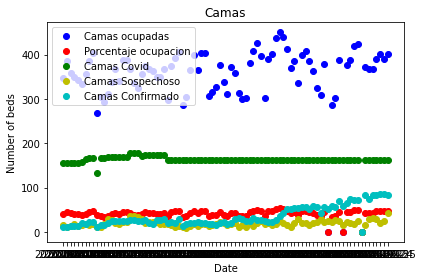

In [102]:
#plt.plot(fecha,informeNumero ,'mo',label='Informe Número')
#plt.plot(fecha,total_camas_hospitales ,'ko',label='Total de Camas')
plt.plot(fecha,camas_ocupadas_hospitales ,'bo',label='Camas ocupadas')
plt.plot(fecha,porcentaje_ocupacion_camas_hospitales ,'ro',label='Porcentaje ocupacion')
plt.plot(fecha,camas_covid ,'go',label='Camas Covid')
plt.plot(fecha,camas_sospechosos_covid ,'yo',label='Camas Sospechoso')
plt.plot(fecha,camas_confirmados_covid ,'co',label='Camas Confirmado')
#plt.ylim((0,650))
plt.xlabel('Date')
plt.ylabel('Number of beds')
plt.title('Camas')
plt.legend(loc='upper left')
#plt.legend(bbox_to_anchor=(0.5, 0.30), loc='upper left')
plt.tight_layout()
plt.show()

En un principio de los datos, las camas sospechosas eran similares a las camas confirmadas, mostrando un cierto control de los casos, teniendo que las camas que se ocupan por casos sospechosos resultan ser los casos verdaderos.

En los últimos datos se observa que el número de camas de casos confirmados supera el número de casos sospechosos, dando a notar que no se puede controlar el virus, y aparecen casos que no están en control en el hospital.

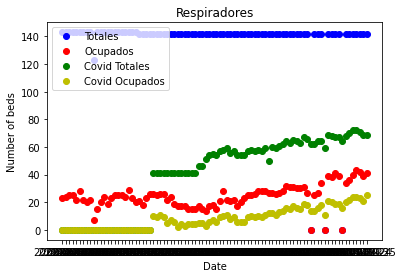

In [108]:
plt.plot(fecha,respiradores_totales ,'bo',label='Totales')
plt.plot(fecha,respiradores_ocupados ,'ro',label='Ocupados')
plt.plot(fecha,respiradores_covid_totales ,'go',label='Covid Totales')
plt.plot(fecha,respiradores_covid_ocupados ,'yo',label='Covid Ocupados')
plt.title('Respiradores')
#plt.ylim((0,650))
plt.xlabel('Date')
plt.ylabel('Number of beds')
plt.legend(loc='upper left')
#plt.legend(bbox_to_anchor=(0.0, 0.0), loc='upper left')
#plt.tight_layout()
plt.show()

En un principio del registro no hay respiradores ocupados por covid. Una vez que se comienzan a utilizar los respiradores